Columns: ['name', 'age', 'gender', 'blood_type', 'medical_condition', 'date_of_admission', 'doctor', 'hospital', 'insurance_provider', 'billing_amount', 'room_number', 'admission_type', 'discharge_date', 'medication', 'test_results']

Missing values:
 name                  0
age                   0
gender                0
blood_type            0
medical_condition     0
date_of_admission     0
doctor                0
hospital              0
insurance_provider    0
billing_amount        0
room_number           0
admission_type        0
discharge_date        0
medication            0
test_results          0
dtype: int64

Duplicate rows: 534
                age  billing_amount  length_of_stay
count  55500.000000    55500.000000    55500.000000
mean      51.539459    25539.316097       15.509009
std       19.602454    14211.454431        8.659600
min       13.000000    -2008.492140        1.000000
25%       35.000000    13241.224652        8.000000
50%       52.000000    25538.069376       

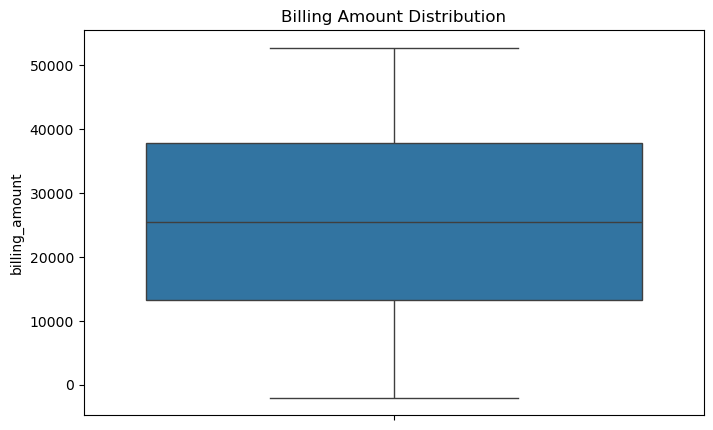

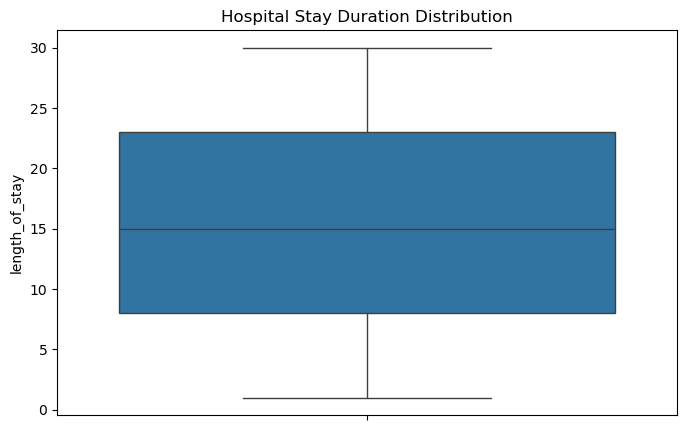

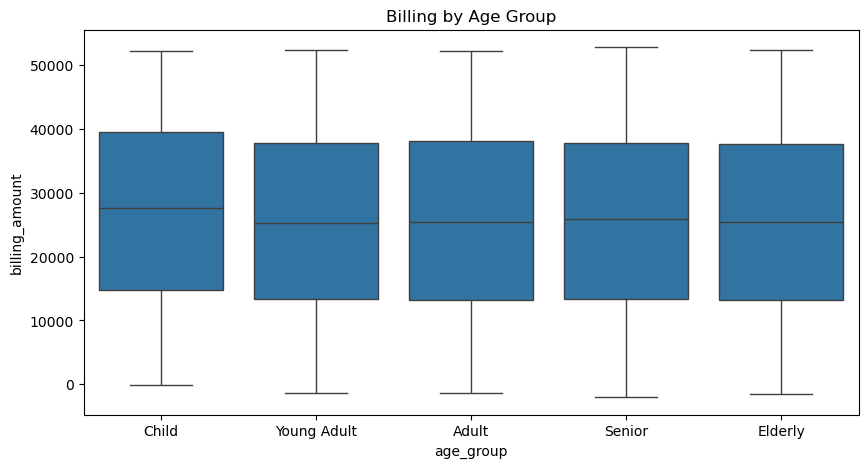

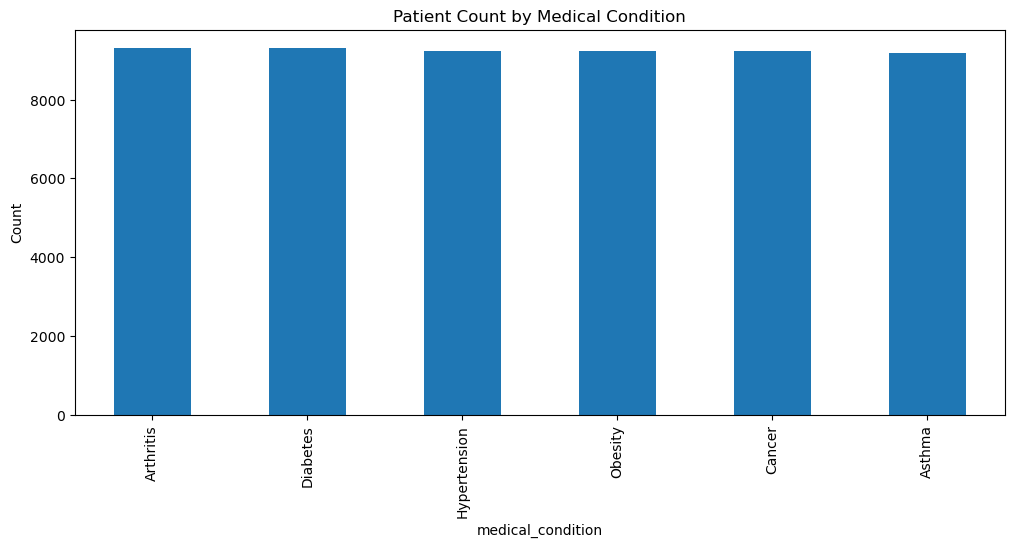

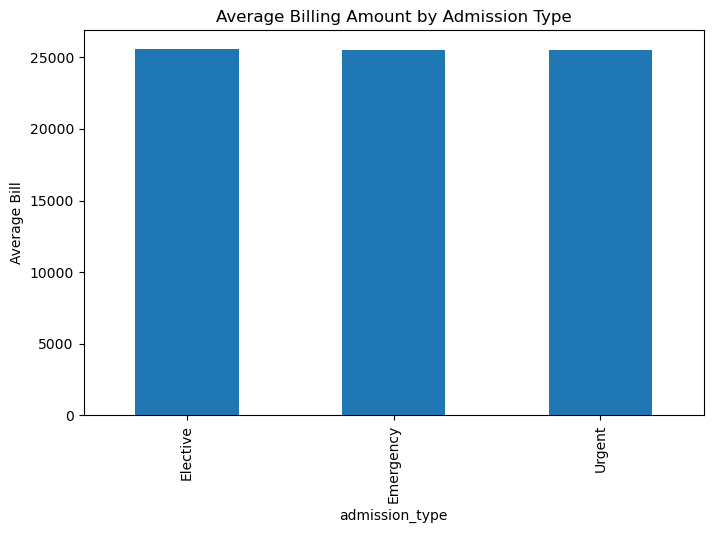

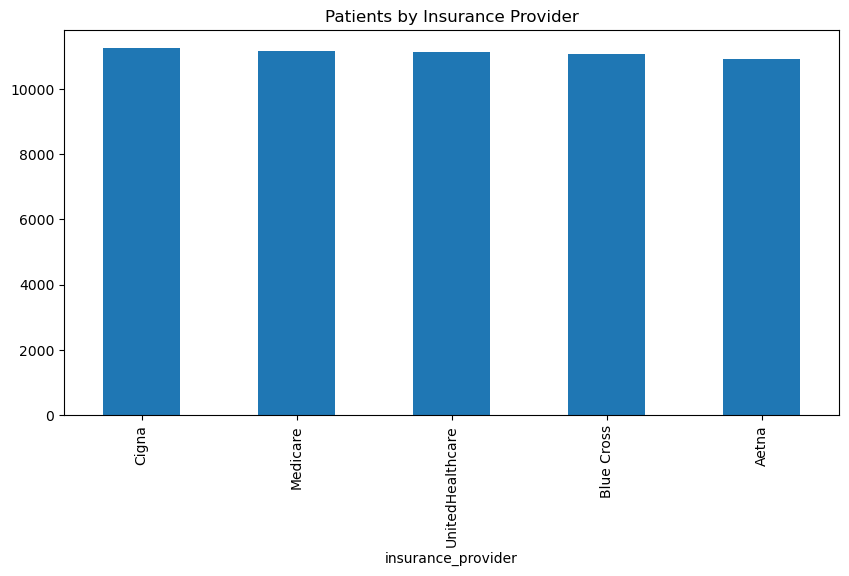

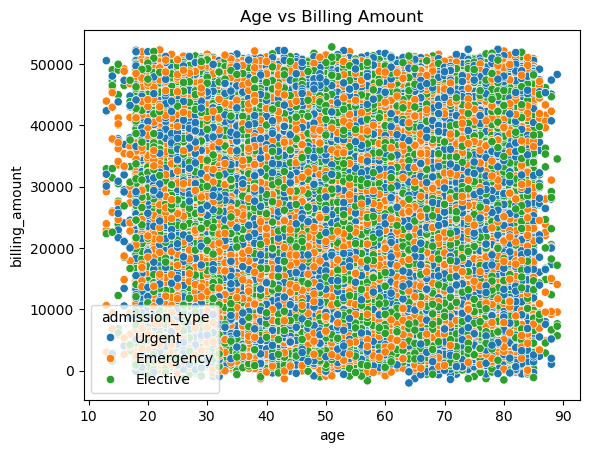

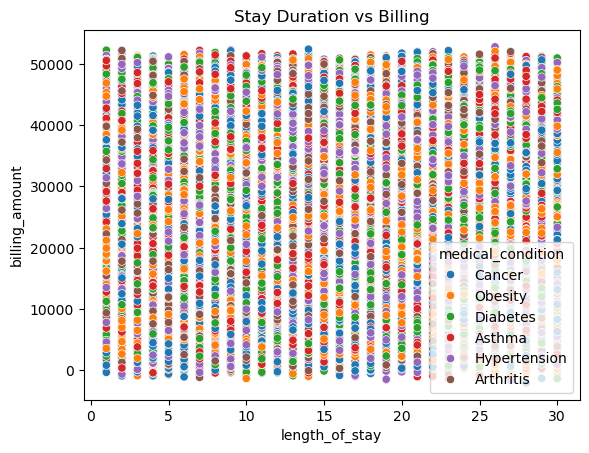

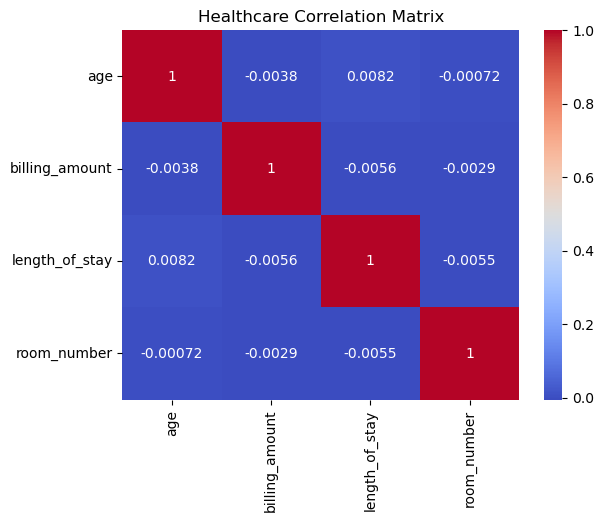


Average bill by condition:

medical_condition
Obesity         25805.971259
Diabetes        25638.405577
Asthma          25635.249359
Arthritis       25497.327056
Hypertension    25497.095761
Cancer          25161.792707
Name: billing_amount, dtype: float64

Average stay by admission type:

admission_type
Elective     15.525328
Emergency    15.595052
Urgent       15.408000
Name: length_of_stay, dtype: float64

Most common medications:

medication
Lipitor        11140
Ibuprofen      11127
Aspirin        11094
Paracetamol    11071
Penicillin     11068
Name: count, dtype: int64


In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("healthcare_dataset.csv")

# Clean column names
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

print("Columns:", df.columns.tolist())
df.head()
print("\nMissing values:\n", df.isnull().sum())
print("\nDuplicate rows:", df.duplicated().sum())

# Convert dates
df["date_of_admission"] = pd.to_datetime(df["date_of_admission"])
df["discharge_date"] = pd.to_datetime(df["discharge_date"])

# Create hospital stay length
df["length_of_stay"] = (df["discharge_date"] - df["date_of_admission"]).dt.days

print(df[["age","billing_amount","length_of_stay"]].describe())
# Age groups
df["age_group"] = pd.cut(df["age"],
                         bins=[0,18,35,50,65,100],
                         labels=["Child","Young Adult","Adult","Senior","Elderly"])

# High billing flag
df["high_cost"] = df["billing_amount"] > df["billing_amount"].quantile(0.75)

df.head()
# Billing amount spread
plt.figure(figsize=(8,5))
sns.boxplot(y=df["billing_amount"])
plt.title("Billing Amount Distribution")
plt.show()

# Length of stay spread
plt.figure(figsize=(8,5))
sns.boxplot(y=df["length_of_stay"])
plt.title("Hospital Stay Duration Distribution")
plt.show()

# Age vs billing
plt.figure(figsize=(10,5))
sns.boxplot(data=df, x="age_group", y="billing_amount")
plt.title("Billing by Age Group")
plt.show()
# Patients by medical condition
plt.figure(figsize=(12,5))
df["medical_condition"].value_counts().plot(kind="bar")
plt.title("Patient Count by Medical Condition")
plt.ylabel("Count")
plt.show()

# Average bill by admission type
plt.figure(figsize=(8,5))
df.groupby("admission_type")["billing_amount"].mean().plot(kind="bar")
plt.title("Average Billing Amount by Admission Type")
plt.ylabel("Average Bill")
plt.show()

# Insurance provider distribution
plt.figure(figsize=(10,5))
df["insurance_provider"].value_counts().plot(kind="bar")
plt.title("Patients by Insurance Provider")
plt.show()
# Age vs bill
sns.scatterplot(data=df, x="age", y="billing_amount", hue="admission_type")
plt.title("Age vs Billing Amount")
plt.show()

# Length of stay vs bill
sns.scatterplot(data=df, x="length_of_stay", y="billing_amount", hue="medical_condition")
plt.title("Stay Duration vs Billing")
plt.show()
sns.heatmap(df[["age","billing_amount","length_of_stay","room_number"]].corr(),
            annot=True, cmap="coolwarm")
plt.title("Healthcare Correlation Matrix")
plt.show()
print("\nAverage bill by condition:\n")
print(df.groupby("medical_condition")["billing_amount"].mean().sort_values(ascending=False))

print("\nAverage stay by admission type:\n")
print(df.groupby("admission_type")["length_of_stay"].mean())

print("\nMost common medications:\n")
print(df["medication"].value_counts().head())
